In this Lab, we will practice in Numpy, Pandas and simple linear regression. We will use the dataset mtcars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Use the dataset cars.csv 

In [2]:
cars_df = pd.read_csv(filepath_or_buffer='cars.csv')
cars_df.head()

,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1.Convert the column mpg to numpy array and print the array. (5)

In [3]:
#Enter your code here
mpg_array = np.array(cars_df.mpg)
print(mpg_array)

[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]


2. calculate how many cars' mpg is under 15. (5)

In [4]:
(mpg_array < 15).sum()

5

3.Show the models that their mpg is under 15. (10)

In [5]:
cars_df.model[mpg_array < 15]

6              Duster 360
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
23             Camaro Z28
Name: model, dtype: object

4.Show how many unique make does the dataset have and print them out. (10)

In [6]:
unique_makes = np.unique(cars_df.make)
print(unique_makes)

['AMC' 'Cadillac' 'Camaro' 'Chrysler' 'Datsun' 'Dodge' 'Duster' 'Ferrari'
 'Fiat' 'Ford' 'Honda' 'Hornet' 'Lincoln' 'Lotus' 'Maserati' 'Mazda'
 'Merc' 'Pontiac' 'Porsche' 'Toyota' 'Valiant' 'Volvo']


5.Show how many cars each make has. (10)

In [7]:
for make in unique_makes:
    print(make, cars_df['make'].value_counts()[make])

AMC 1
Cadillac 1
Camaro 1
Chrysler 1
Datsun 1
Dodge 1
Duster 1
Ferrari 1
Fiat 2
Ford 1
Honda 1
Hornet 2
Lincoln 1
Lotus 1
Maserati 1
Mazda 2
Merc 7
Pontiac 1
Porsche 1
Toyota 2
Valiant 1
Volvo 1


6.Creat the scatter plot with X axis is hp and Y axis is mpg.(10)

<Axes: xlabel='hp', ylabel='mpg'>

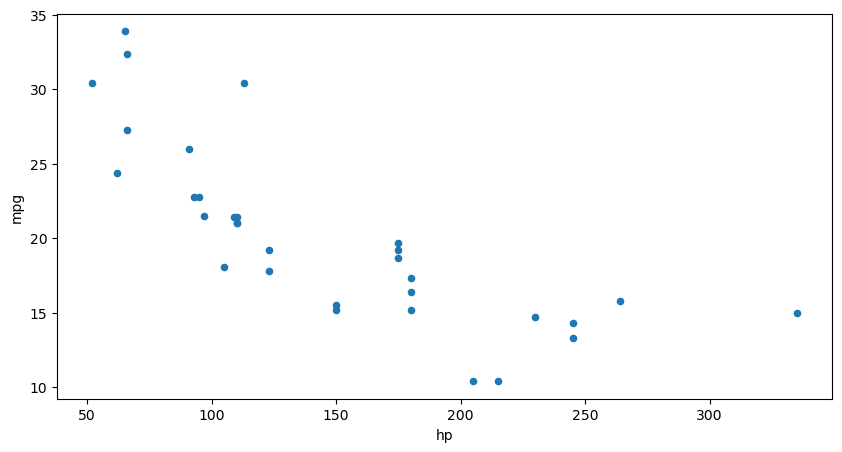

In [8]:
cars_df.plot(kind = 'scatter', x = 'hp', y = 'mpg', figsize = (10,5))

7.Train the linear model using hp as variable and MPG as target and print $\theta_{0}$, $\theta_{1}$ (10) 

(hint: use the fomula: $\theta = (\mathrm{X}^{T}\mathrm{X})^{-1}\mathrm{X}^{T}\mathrm{y}$)

In [9]:
hp = cars_df['hp']
a = np.ones((hp.shape[0], 1))
X = np.hstack((a, hp.values.reshape(-1,1)))
y = cars_df['mpg']

theta = np.matmul(np.linalg.inv(np.matmul(X.T,X)), np.matmul(X.T,y))
theta

array([30.09886054, -0.06822828])

8.Plat the scatter plot again with the line showing the linear model.(10)

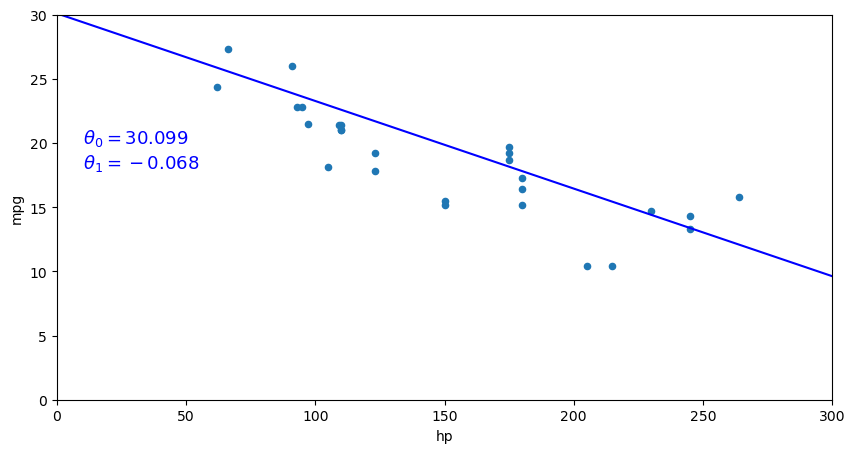

In [10]:
cars_df.plot(kind = 'scatter', x = 'hp', y = 'mpg', figsize = (10,5))
plt.axis([0,300,0,30])
X = np.linspace(0,300,10)
plt.plot(X, theta[0] + theta[1] * X, "b")
plt.text(10, 20, r"$\theta_0 = 30.099$", fontsize=13, color="b") 
plt.text(10, 18, r"$\theta_1 = -0.068$", fontsize=13, color="b") 
plt.show()

9.Random choose 3 datapoint from the dataset, use the linear model to predict the MPG with HP, show the difference between predict value and real value. (10)

In [11]:
datapoints_x = [cars_df.hp[8], cars_df.hp[20], cars_df.hp[23]]
datapoints_y = [cars_df.mpg[8], cars_df.mpg[20], cars_df.mpg[23]]
errors = 3 * [0]
predicted = 3 * [0];
for i in range(3):
    predicted[i] = theta[0] + theta[1] * datapoints_x[i]

print("Predicted Values:", predicted)
print("Actual Values:",datapoints_y)

for i in range(3):
    errors[i] = datapoints_y[i] - predicted[i]

print("Errors:", errors)

Predicted Values: [23.617174122823954, 23.48071756668083, 13.382932412089428]
Actual Values: [22.8, 21.5, 13.3]
Errors: [-0.8171741228239533, -1.9807175666808305, -0.08293241208942703]


10.Explain the why some differences are large, some are not(10)

In [12]:
# The variation in errors is due to when training the model we try not to get to close to the values, have errors of 0, to prevent overfitting.

11.Find $\mathrm{R}^{2}$ and use $\mathrm{R}^{2}$ to explain whether the model is accurate.(10)

In [13]:
# 1 - (SSE / SST)
x = cars_df['hp']
y = cars_df['mpg']
predicted = [1] * len(y)
SST, SSE = 0, 0

for i in range(len(y)):
    predicted[i] = theta[0] + theta[1] * x[i]

SST = ((y - y.mean())**2).sum()
SSE = ((y - predicted)**2).sum()

print(1 - (SSE/SST))

0.602437341423934
